<a href="https://colab.research.google.com/github/niharika-2510/daytona/blob/main/toy_project_placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

# **Steps**



1.   Preprocess + EDA + Feature Selection
2.   Extract input and output cols
3.   Scale the values
4.   Train test split
5.   Train the model
6.   Evaluate the model/model selection
7.   Deploy the model







In [4]:
df = pd.read_csv('/content/placement-dataset.csv')

In [5]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


**Data Preprocessing**

In [6]:
df = df.iloc[:,1:]

In [9]:
df.shape

(100, 3)

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


# EDA (Exploratory Data Analysis)

In [10]:
import matplotlib.pyplot as plt

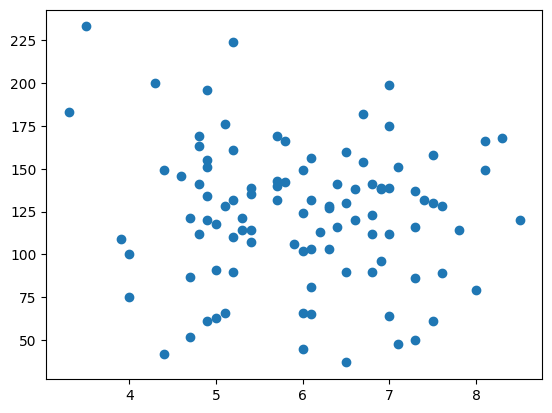

In [11]:
plt.scatter(df['cgpa'],df['iq'])

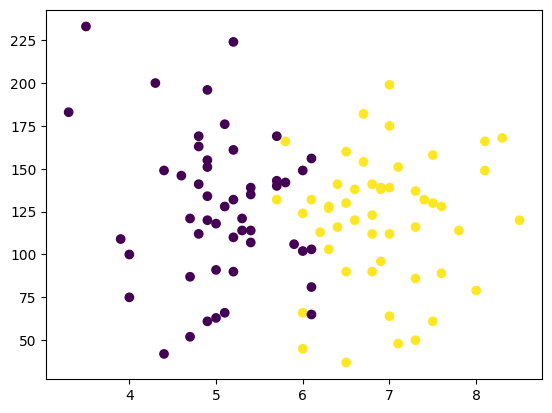

In [13]:
plt.scatter(df['cgpa'],df['iq'], c = df['placement'])   # c is used for color coding where yellow represents placed students

# Extract input and output cols

In [14]:
x = df.iloc[:,0:2]

In [15]:
y = df.iloc[:,-1]

In [16]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [17]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [18]:
x.shape

(100, 2)

In [19]:
y.shape

(100,)

# Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

In [22]:
x_train

,cgpa,iq
82,6.5,37.0
83,7.5,130.0
90,7.3,86.0
48,6.6,138.0
44,7.5,61.0
...,...,...
42,7.6,89.0
51,4.8,141.0
36,5.7,140.0
97,6.7,182.0


In [23]:
y_train

,placement
82,1
83,1
90,1
48,1
44,1
...,...
42,1
51,0
36,0
97,1


In [24]:
x_test

,cgpa,iq
96,4.4,42.0
21,7.1,151.0
76,4.9,155.0
6,5.7,143.0
29,7.0,112.0
61,7.3,137.0
46,5.3,114.0
85,5.8,166.0
84,5.7,169.0
22,4.9,120.0


In [25]:
y_test

,placement
96,0
21,1
76,0
6,0
29,1
61,1
46,0
85,1
84,0
22,0


# Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
x_train = scaler.fit_transform(x_train)

In [29]:
x_train

array([[ 0.42358635, -2.13789506],
       [ 1.29001297,  0.1803044 ],
       [ 1.11672764, -0.91647814],
       [ 0.51022901,  0.37971941],
       [ 1.29001297, -1.53965003],
       [ 1.11672764, -0.16867186],
       [ 0.33694369, -0.16867186],
       [-2.34897884,  1.50142883],
       [ 0.68351433, -0.81677063],
       [ 1.11672764, -1.81384567],
       [-0.87605358, -0.11881811],
       [-0.26955495,  0.23015815],
       [-1.7424802 , -0.56750187],
       [-0.00962696,  0.03074315],
       [ 0.16365836, -0.24345249],
       [-1.13598157, -0.04403748],
       [ 0.68351433,  0.45450004],
       [ 0.94344232, -1.86369942],
       [ 0.85679966, -1.46486941],
       [-0.09626962, -0.41794062],
       [-1.39590955,  0.65391504],
       [-0.00962696, -1.93848005],
       [-0.70276826, -0.31823312],
       [-0.70276826, -0.81677063],
       [-0.87605358, -0.79184376],
       [ 0.42358635,  0.1803044 ],
       [ 0.0770157 ,  0.82840318],
       [-1.13598157, -0.89155126],
       [-0.52948293,

In [30]:
x_test = scaler.transform(x_test)

In [31]:
x_test

array([[-1.39590955, -2.01326068],
       [ 0.94344232,  0.7037688 ],
       [-0.96269624,  0.8034763 ],
       [-0.26955495,  0.50435379],
       [ 0.85679966, -0.26837936],
       [ 1.11672764,  0.35479253],
       [-0.6161256 , -0.21852561],
       [-0.18291229,  1.07767193],
       [-0.26955495,  1.15245256],
       [-0.96269624, -0.06896436]])

# Model Training

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
clf = LogisticRegression()

In [34]:
clf.fit(x_train,y_train)

LogisticRegression()

# Model Evaluation

In [37]:
y_pred = clf.predict(x_test)

In [38]:
y_pred

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0])

In [36]:
y_test

,placement
96,0
21,1
76,0
6,0
29,1
61,1
46,0
85,1
84,0
22,0


In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_test, y_pred)

0.9

## Plotting decision boundary

In [42]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

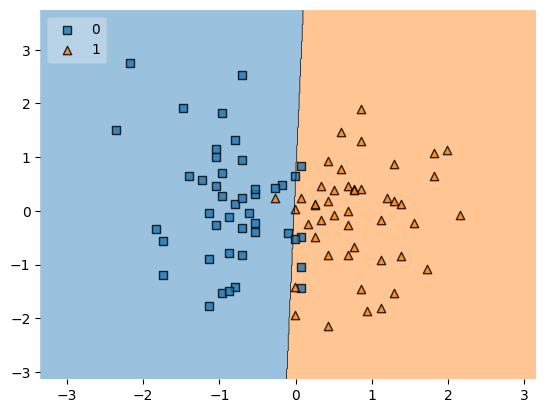

In [43]:
# Plotting decision regions
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [44]:
import pickle

In [45]:
pickle.dump(clf,open('model.pkl','wb'))